      Temp
0     20.7
1     17.9
2     18.8
3     14.6
4     15.8
...    ...
3645  14.0
3646  13.6
3647  13.5
3648  15.7
3649  13.0

[3650 rows x 1 columns]


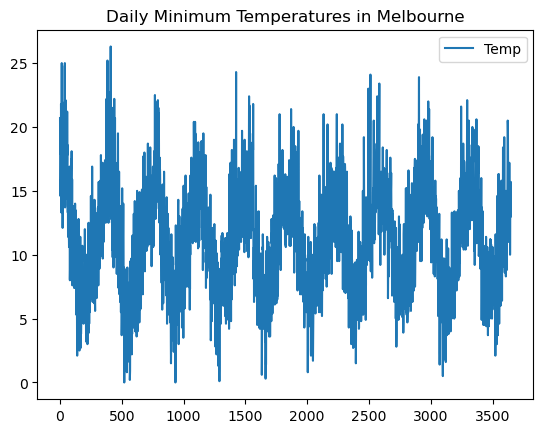

C:\Users\Atharva Digambar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0818 - val_loss: 0.0109
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0119 - val_loss: 0.0108
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0120 - val_loss: 0.0106
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0107 - val_loss: 0.0110
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0112 - val_loss: 0.0107
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0110 - val_loss: 0.0104
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0109 - val_loss: 0.0103
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0109 - val_loss: 0.0101
Epoch 9/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0100 - val_loss: 0.0107
Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0102 - val_loss: 0.0102
Epoch 11/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0100 - val_loss: 0.0102
Epoch 12/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0

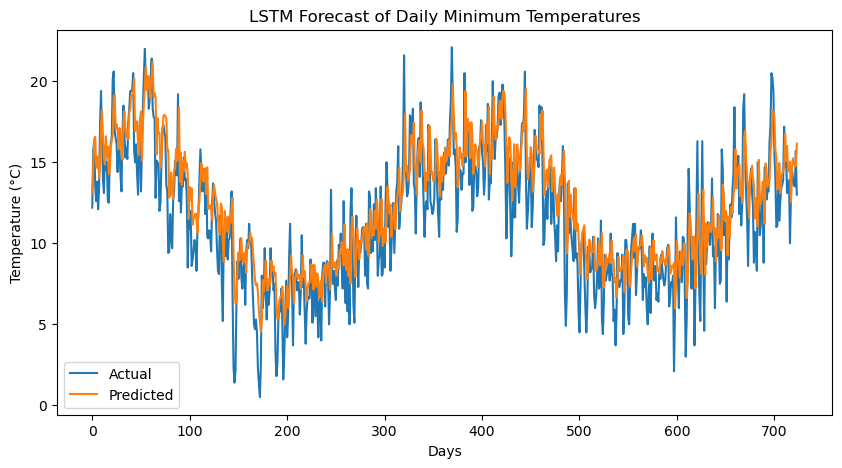

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.datasets import get_rdataset

# 1. Load built-in temperature dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url, parse_dates=['Date'])
df = df[['Temp']]
print(df)

# 2. Visualize
df.plot(title="Daily Minimum Temperatures in Melbourne")
plt.show()

# 3. Normalize
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

# 4. Create sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

SEQ_LEN = 30
X, y = create_sequences(scaled, SEQ_LEN)

# 5. Train/Test split
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# 6. Build LSTM Model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(SEQ_LEN, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()

# 7. Train
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# 8. Predict
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# 9. Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('LSTM Forecast of Daily Minimum Temperatures')
plt.xlabel('Days')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()
